In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import optuna

from floOTflix.datasets import toydata_get_dataset
from floOTflix.utils import seed
from floOTflix.plots import plot_heatmap
from floOTflix.models import CLIDIOTModel

# Generate dataset

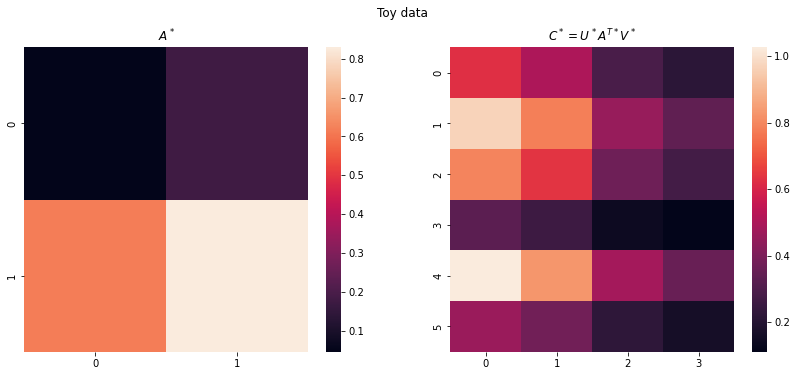

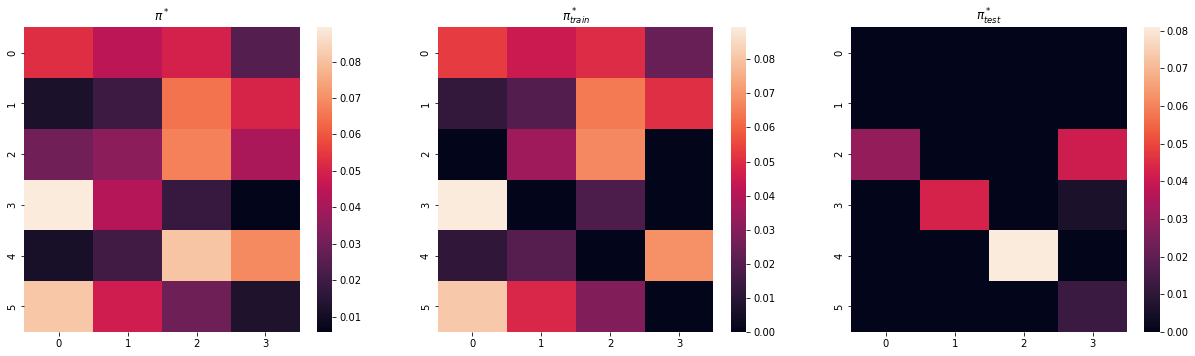

In [28]:
m, n = 6, 4
k = 2

seed(2)

(X_train, y_train), (X_test, y_test), (pi_train, pi_test, C_truth, U_truth, V_truth, A_truth) = toydata_get_dataset(m, n, k)

pi_sample = pi_train.nan_to_num() + pi_test.nan_to_num()
X = torch.cat([X_train, X_test], dim=0)
y = torch.cat([y_train, y_test], dim=0)

pi_train = torch.zeros((m, n))
pi_train[X_train[:, 0], X_train[:, 1]] = y_train

pi_test = torch.zeros((m, n))
pi_test[X_test[:, 0], X_test[:, 1]] = y_test

plot_heatmap(matrices=[A_truth, C_truth], titles=["$A^*$", "$C^* = U^*{A^T}^*V^*$"], title="Toy data")
plot_heatmap(matrices=[pi_sample, pi_train, pi_test], titles=["$\pi^*$", "$\pi^*_{train}$", "$\pi^*_{test}$"])

# Solve using CLIDIOT

/Users/lucasmrdt/.pyenv/versions/3.10.6/lib/python3.10/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 11
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/Users/lucasmrdt/.pyenv/versions/3.10.6/lib/python3.10/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Epoch 0, train error: 0.07214440405368805, test error: 0.06494927406311035
Epoch 10, train error: 0.049576230347156525, test error: 0.043119870126247406
Epoch 20, train error: 0.049576230347156525, test error: 0.043119870126247406
Epoch 30, train error: 0.049576230347156525, test error: 0.043119870126247406
Epoch 40, train error: 0.049576230347156525, test error: 0.043119870126247406
Epoch 50, train error: 0.049576230347156525, test error: 0.043119870126247406
Epoch 60, train error: 0.049576230347156525, test error: 0.043119870126247406
Epoch 70, train error: 0.049576230347156525, test error: 0.043119870126247406
Epoch 80, train error: 0.049576230347156525, test error: 0.043119870126247406
Epoch 90, train error: 0.049576230347156525, test error: 0.043119870126247406


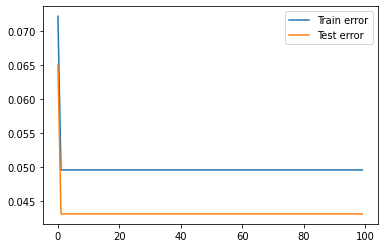

In [29]:
m, n, k = *pi_sample.shape, A_truth.shape[0]

def F(pi_ij):
    return pi_ij


model = CLIDIOTModel(m=m, n=n, F=F)

U = U_truth
V = V_truth
eps = 10
prox_gamma = 0.5
prox_reg = 1
prox_lr = 1e-3

train_errors, test_errors = model.fit(X_train, y_train, X_test, y_test,
                                        U=U,
                                        V=V,
                                        eps=eps,
                                        max_clidiot_iter=100,
                                        max_prox_iter=1000,
                                        prox_gamma=prox_gamma,
                                        prox_reg=prox_reg,
                                        prox_lr=prox_lr,
                                        #   eps_num_stability=eps_num_stability,
                                        verbose=True)

sns.lineplot(x=np.arange(len(train_errors)), y=train_errors, label="Train error")
sns.lineplot(x=np.arange(len(test_errors)), y=test_errors, label="Test error");

/Users/lucasmrdt/.pyenv/versions/3.10.6/lib/python3.10/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


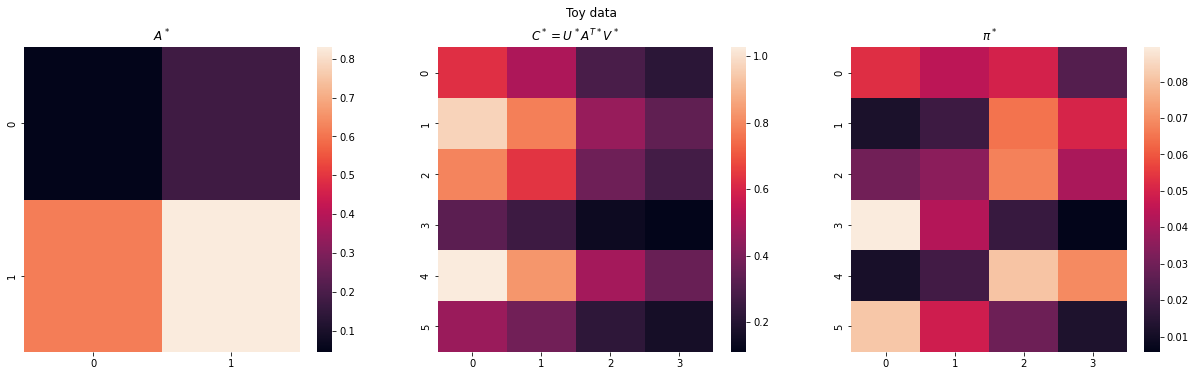

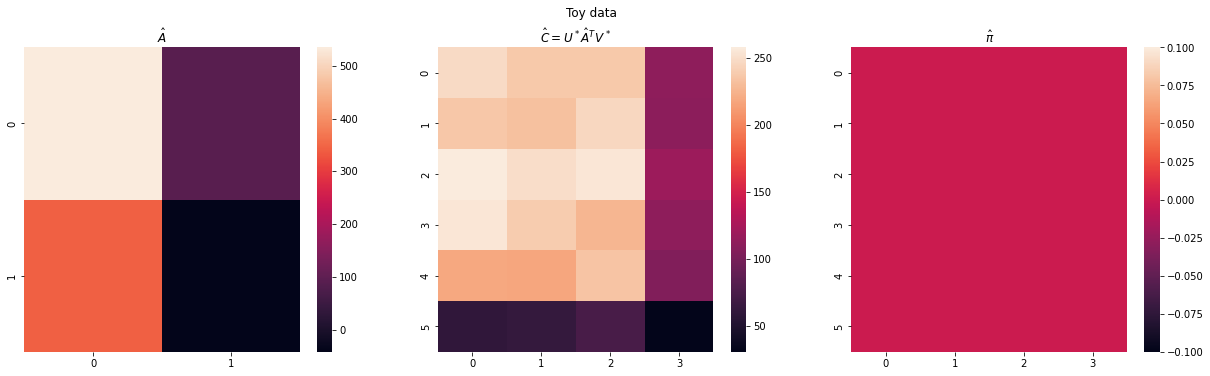

In [30]:
A_hat = model.A
C_hat = U @ A_hat @ V.t()
_, pi_hat = model.predict(X)

plot_heatmap(matrices=[A_truth, C_truth, pi_sample], titles=["$A^*$", "$C^* = U^*{A^T}^*V^*$", "$\pi^*$"], title="Toy data")
plot_heatmap(matrices=[A_hat, C_hat, pi_hat], titles=["$\hat{A}$", "$\hat{C} = U^* \hat{A}^T V^*$", "$\hat{\pi}$"], title="Toy data")